In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Three data sets, model fit, and regularization
- Practice with train_test_split()
- Show models underfitting, fitting, and overfitting some training data,
  and the effect of each on unseen test data.
- Compare Lasso and Ridge regularized models to a corresponding overfit OLS model.

### Three data sets: practice with train_test_split():

In [2]:
X = np.arange(100) # quick fake data: X = 0 to 99, y = 90 zeros, 10 ones
y = np.concatenate([np.full(shape=90, fill_value=0),
                    np.full(shape=10, fill_value=1)])
# split 80% training data, 20% "_tmp" for validation & test
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.2,
                                                  random_state=0, stratify=y)
# of remaining 20%, split in half to get 10% validation, 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp) # try without random_state, stratify
print(f'X_train={X_train},\nX_valid={X_valid},\nX_test={X_test}')
print(f'y_train={y_train},\ny_valid={y_valid},\ny_test={y_test}')

X_train=[ 0 43 57 84 56 20 60 16 54 45 18  3 89 30 77 28 19 82 59 92 52 32 85 66
 34 88 33  4 29 76  5 73 87 75 49 78 31 50 81 41 23 80 62 63 10 91 42 55
 98 27 24 35 69 26 15 96 61 97 74 13 93 17  8 79 11 22 68 51 14 53  1 48
 71 38  7  2 99  6 94 40],
X_valid=[39 47 83 64 44 46 90 58 86 65],
X_test=[67 25 95 36 21 12  9 70 72 37]
y_train=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0],
y_valid=[0 0 0 0 0 0 1 0 0 0],
y_test=[0 0 1 0 0 0 0 0 0 0]


## Model fit (underfit, fit, overfit) and regularization

### We will make a series of polynomial regression models $y_i = \sum_{p=0}^D w_i x_i^p + \epsilon_i$.
- For $D=0$, this is $y_i = w_0 = b + \epsilon_i$, a constant model (horizontal line).
- For $D=1$, this is $y_i = w_0 + w_1 x_i + \epsilon_i$, a line.
- For $D=2$, this is $y_i = w_0 + w_1 x_i + w_2 x_i^2 + \epsilon_i$, a parabola.
- For $D=N-1$, this is a polynomial that can fit all $N$ data points exactly.

We will investigate what happens to the fit (underfit, fit, or overfit?) as $D$ increases.

#### Practice using PolynomialFeatures() to  make an array whose columns are powers of $x$:

In [3]:
x_demo = np.arange(4)
polynomial = PolynomialFeatures(degree=2) # also try degree=0, degree=1
polynomial.fit_transform(x_demo.reshape(-1, 1))

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

### Make 2N $x$-coordinates over the interval [low, high]
(N for training and N for testing)

In [4]:
low = -2
high = 2
N = 10
x = np.linspace(start=low, stop=high, num=2*N)

### Make corresponding $y$-coordinates from $y_i = x_i^2 + \epsilon_i$,
where $\epsilon_i$ is a little random noise.
This is the true relationship we wish to model. Pretend we do not know it.

In [5]:
rng = np.random.default_rng(seed=0)
noise = rng.normal(loc=0, scale=1, size=2*N)
y = x**2 + noise

### Loop through dimensions D in $0, \ldots, 9$, making a model for each D:
Well, make an OLS polynomial regression model, but also Lasso and Ridge regularized models.

#### Guidance (for teacher) on exploring this example:
- First:
  - Restrict to just OLS given by linear_model.LinearRegression() by adding "[0:1]"
    at the end of the "models" list.
  - Comment out line plotting 'test' data.
  - Notice:
    - Increasing the polynomial degree $D$ increases the visual fit of the model to the
      training data until $D = 9$ fits the $D + 1 = 10$ points perfectly.
    - MSE_train (computed on the black dot training data) decreases with increasing $D$,
      i.e. with increasing model complexity, all the way to 0 with $D = 9$.
      - Do not get excited about a model performing well on training data.
- Second:
  - Uncomment line plotting 'test' data to see wild overfitting as $D$ increases past 6.
  - Notice that by inspecting MSE_test (computed on the aqua dot test data), we can see:
    - For $D < 2$, these models underfit.
      - The $D = 0$ model uses $\hat{y} = \bar{y}$ (the average $y$),
        ignoring the features $\mathbf{x}$! We better do better than it.
    - For $D = 2$ (and $D = 3$ and $D = 5$), they fit well.
    - For $D > 6$, they overfit badly.
- Third:
  - Remove "[0:1]" from the end of the "models" list to include regularized models.
  - Notice: Regularization works! It saves way-overfit models from disaster.
    - Lasso does feature selection, setting many coefficients to zero.
    - Both Lasso and Ridge dramatically help address overfitting.

D=0:
                  model MSE_train MSE_test .intercept_ .coef_
0    LinearRegression()      2.71     4.59         0.7     []
0  Lasso(max_iter=2000)      2.71     4.59         0.7     []
0               Ridge()      2.71     4.59         0.7     []


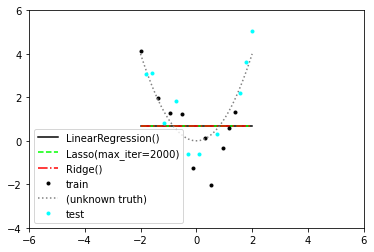

D=1:
                  model MSE_train MSE_test .intercept_   .coef_
0    LinearRegression()      1.65     7.78        0.64  [-0.96]
0  Lasso(max_iter=2000)      2.52     4.75         0.7  [-0.09]
0               Ridge()      1.66     7.41        0.65  [-0.88]


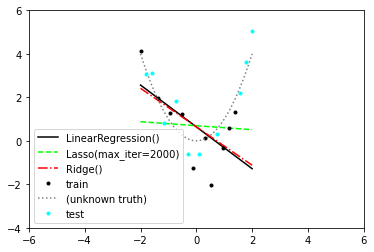

D=2:
                  model MSE_train MSE_test .intercept_         .coef_
0    LinearRegression()      0.59     1.29       -0.49  [-0.46, 1.01]
0  Lasso(max_iter=2000)      1.54     2.28        0.18   [-0.0, 0.45]
0               Ridge()       0.6     1.43       -0.41  [-0.46, 0.94]


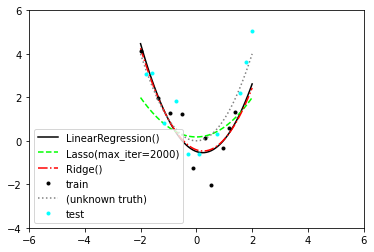

D=3:
                  model MSE_train MSE_test .intercept_               .coef_
0    LinearRegression()      0.42     0.49       -0.72  [-1.26, 1.41, 0.44]
0  Lasso(max_iter=2000)      1.59     8.15        0.53   [-0.0, 0.0, -0.27]
0               Ridge()       0.5     0.65       -0.49  [-0.71, 1.08, 0.15]


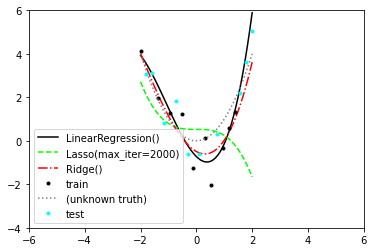

D=4:
                  model MSE_train MSE_test .intercept_  \
0    LinearRegression()      0.38      3.6       -0.51   
0  Lasso(max_iter=2000)      1.04     0.99        0.07   
0               Ridge()      0.48     0.56       -0.39   

                      .coef_  
0  [-1.68, 0.75, 0.78, 0.28]  
0    [-0.0, 0.0, -0.0, 0.24]  
0  [-0.92, 0.66, 0.36, 0.19]  


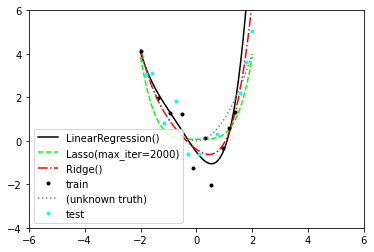

D=5:
                  model MSE_train MSE_test .intercept_  \
0    LinearRegression()      0.35     1.34       -0.64   
0  Lasso(max_iter=2000)      1.08     1.81        0.12   
0               Ridge()      0.47     4.96       -0.41   

                            .coef_  
0  [-2.2, 1.46, 1.64, -0.13, -0.3]  
0   [-0.0, 0.0, -0.0, 0.19, -0.02]  
0  [-0.79, 0.42, -0.02, 0.4, 0.16]  


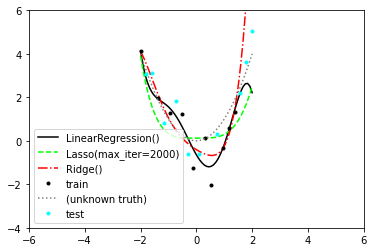

D=6:
                  model MSE_train MSE_test .intercept_  \
0    LinearRegression()      0.35     3.36       -0.61   
0  Lasso(max_iter=2000)      1.21     1.24        0.19   
0               Ridge()      0.47      8.5       -0.39   

                                    .coef_  
0  [-2.27, 1.29, 1.81, 0.06, -0.37, -0.05]  
0       [-0.0, 0.0, -0.0, 0.0, -0.0, 0.06]  
0    [-0.8, 0.44, -0.09, 0.31, 0.21, 0.04]  


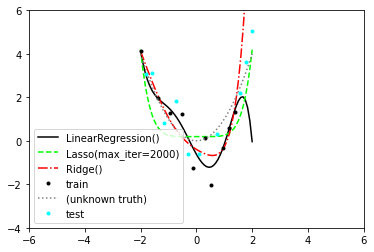

D=7:
                  model MSE_train MSE_test .intercept_  \
0    LinearRegression()      0.35    55.55       -0.56   
0  Lasso(max_iter=2000)      1.21     1.24        0.19   
0               Ridge()      0.47     9.93       -0.39   

                                          .coef_  
0  [-2.04, 0.67, 0.92, 0.98, 0.44, -0.38, -0.22]  
0        [-0.0, 0.0, -0.0, 0.0, -0.0, 0.06, 0.0]  
0     [-0.8, 0.44, -0.08, 0.29, 0.2, 0.05, 0.01]  


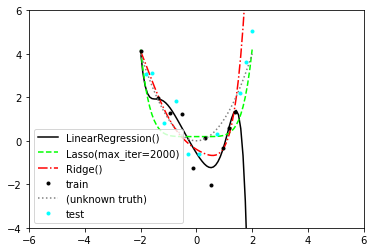

D=8:
                  model MSE_train MSE_test .intercept_  \
0    LinearRegression()      0.28  7690.07       -0.93   
0  Lasso(max_iter=2000)      1.21     1.24        0.19   
0               Ridge()      0.47     7.63       -0.39   

                                                  .coef_  
0  [-1.06, 5.46, -5.13, -10.0, 8.04, 7.69, -2.71, -1.88]  
0           [-0.0, 0.0, -0.0, 0.0, -0.0, 0.06, 0.0, 0.0]  
0     [-0.8, 0.43, -0.08, 0.29, 0.21, 0.06, -0.0, -0.01]  


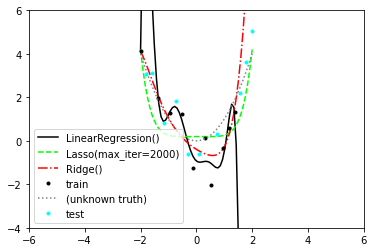

D=9:
                  model MSE_train   MSE_test .intercept_  \
0    LinearRegression()       0.0  488937.97       -0.38   
0  Lasso(max_iter=2000)       1.2      20.01        0.17   
0               Ridge()      0.45       41.2       -0.41   

                                                              .coef_  
0  [8.48, -6.04, -68.74, 30.21, 114.51, -35.04, -66.48, 11.18, 12.6]  
0                [-0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.04, 0.01]  
0           [-0.82, 0.41, -0.15, 0.35, 0.14, 0.2, 0.19, -0.1, -0.07]  


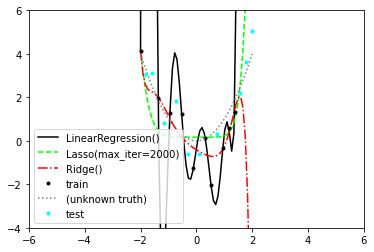

In [6]:
N_plot = 50
x_plot = np.linspace(start=low, stop=high, num=N_plot)

for D in np.arange(N):
    polynomial = PolynomialFeatures(degree=D)
    X = polynomial.fit_transform(x.reshape(-1, 1))
    X_plot = polynomial.fit_transform(x_plot.reshape(N_plot, 1))

    # indices_train and indices_test are subsets of np.arange(2*N) to plot train & test separately
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
        X, y, np.arange(2*N), test_size=0.5, random_state=0)

    models = [linear_model.LinearRegression(),
              linear_model.Lasso(max_iter=2000),
              linear_model.Ridge()] # add suffix "[0:1]" to see only OLS
    # put numbers to report in a DataFrame for clean display in columns
    df = pd.DataFrame(columns=['model', 'MSE_train', 'MSE_test', '.intercept_', '.coef_'])
    for model in models:
        model.fit(X_train, y_train)
        MSE_train = (1/y_train.size) * np.sum((y_train - model.predict(X_train))**2)
        MSE_test = (1/y_test.size)  * np.sum((y_test - model.predict(X_test))**2)
        new_row = pd.DataFrame({'model': model, 'MSE_train': MSE_train,
                                     'MSE_test': MSE_test, '.intercept_': model.intercept_,
                                     # I'm not showing .coef_[0], always 0 here, absorbed by .intercept_
                                     '.coef_': [np.round(model.coef_[1:], 2)]}) # round for display
        df = pd.concat([df, new_row])
    pd.set_option('display.precision', 2)
    pd.set_option('display.max_colwidth', 100) # prevent '...' in model_coef_ display
    print(f'D={D}:\n{df}')
    if (True): # make plot
        model_colors = ['black', 'lime', 'red']
        model_linestyles = ['solid', 'dashed', 'dashdot']
        for i in np.arange(len(models)):
            model = models[i]
            y_plot = model.predict(X_plot)
            plt.plot(x_plot, y_plot, linestyle=model_linestyles[i], color=model_colors[i], label=model)
        plt.plot(x[indices_train], y[indices_train], linestyle='None', marker='.', color='black', label='train')
        plt.plot(x_plot, x_plot**2, linestyle='dotted', color='gray', label='(unknown truth)')
        plt.plot(x[indices_test], y[indices_test], linestyle='None', marker='.', color='aqua', label='test')
        plt.xlim(-6, 6)
        plt.ylim(-4, 6)
        plt.legend()
        plt.show(block=False)

### These explorations are harder in real life:
- We never know the "unknown truth," here that we were sampling
  from $y_i = x_i^2 + \epsilon_i$.
- Visualizing data with $D > 2$ is difficult or impossible.